# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [101]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

import requests
import time
import json

# to display todays date in graph titles
from datetime import date
todays_date = date.today().strftime('%m/%d/%y')


# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy    # pip install citipy - for Module not found error

# Output File (CSV)

output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

print(api_key)

4f85b454a4267a1b727988c7859e5a2e


## Generate Cities List

In [102]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

In [33]:
#cities

In [103]:
cities = pd.DataFrame({
    "City": cities
})
cities

,City
0,popondetta
1,alnavar
2,mataura
3,busselton
4,rikitea
...,...
613,zhigansk
614,chippewa falls
615,hauterive
616,luangwa


In [104]:
cities_df = pd.DataFrame({
    "City": []
})

cities_df["Cloudiness"] =''
cities_df["Country"]=''
cities_df["Date"]=''
cities_df["Humidity"]=''
cities_df["Lat"]=''
cities_df["Lng"]=''
cities_df["Max Temp"]=''
cities_df["Wind Speed"]=''
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [105]:
# base url by city name search

#https://samples.openweathermap.org/data/2.5/weather?q=London,uk&appid=b6907d289e10d714a6e88b30761fae22

base_url = "http://api.openweathermap.org/data/2.5/weather"

# dictionary to store query parameters

params={'appid':api_key}


In [106]:
#use iterrows to iterate through pandas dataframe

index_in_one_set = 0
set_number = 1
success_count = 0
set_size = 50
fail_count = 0
index_list = []

print("Beginning Data Retrieval")
print("-----------------------------")
for index,row in cities.iterrows():
    
    #time.sleep(0.8) # to pause for 0.8 secs between the api calls
    time.sleep(5)  # to pause for 5 secs between the api calls
    
    #remainders - 0 to 49 - Index for each set
    index_in_one_set = index%set_size 
    
    #storing the values 0 to 49 in a list
    if index_in_one_set not in index_list:
        index_list.append(index_in_one_set)
    
    # get city name from dataframe
    city_name = row['City']
    
    #adding q to params dictionary to search with each city name in each row
    params['q'] = city_name
    
    # final url construction , making api request 
    response = requests.get(base_url,params = params).json()
    
    #using index list values as indexes for each set so that all the values from 0 to 49 are retrieved in sequence
    #using index_in_one_set has missing index values for failed API calls as it increaments by 1 in each call
    
    indexss = index_list[success_count%50]
    
    #getting city names for each successful API call by handling exceptions
    
    try:
        print(f"Proceesing Record {indexss} of set {set_number}| {response['name']}")
                 
        success_count= success_count + 1 # counts the successful API calls 
                        
        if success_count % set_size == 0:  #increaments set number for each set(set size = 50)
                        set_number+=1
                                      
        #if index_in_one_set == set_size-1:
         #     set_number+=1 
        
        #getting values for the dataframe for each successful API call
        
        cities_df.loc[index,'City']=response['name']
        cities_df.loc[index,'Cloudiness']=response['clouds']['all']
        cities_df.loc[index,'Country']=response['sys']['country']
        cities_df.loc[index,'Date']=response['dt']
        cities_df.loc[index,'Humidity']=response['main']['humidity']
        cities_df.loc[index,'Lat']=response['coord']['lat']
        cities_df.loc[index,'Lng']=response['coord']['lon']
        cities_df.loc[index,'Max Temp']=response['main']['temp_max']
        cities_df.loc[index,'Wind Speed']=response['wind']['speed']                            
            
    except(KeyError):
              #error_index = index_in_one_set
              print("City not found. Skipping...")
              fail_count = fail_count + 1
                          
    except(ConnectionError,ConnectionResetError,ProtocolError):
              print("Connection problems - moving to next city")
              fail_count = fail_count + 1
                  
print("-----------------------------")
print("Data Retrieval complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Proceesing Record 0 of set 1| Popondetta
Proceesing Record 1 of set 1| Alnavar
Proceesing Record 2 of set 1| Mataura
Proceesing Record 3 of set 1| Busselton
Proceesing Record 4 of set 1| Rikitea
Proceesing Record 5 of set 1| Thompson
City not found. Skipping...
Proceesing Record 6 of set 1| Beringovskiy
Proceesing Record 7 of set 1| Antibes
Proceesing Record 8 of set 1| Kieta
Proceesing Record 9 of set 1| Severo-Kurilsk
Proceesing Record 10 of set 1| Qaanaaq
City not found. Skipping...
Proceesing Record 11 of set 1| Pisco
Proceesing Record 12 of set 1| Castro
Proceesing Record 13 of set 1| Saint-Philippe
Proceesing Record 14 of set 1| Tasiilaq
Proceesing Record 15 of set 1| Saint George
City not found. Skipping...
Proceesing Record 16 of set 1| Ushtobe
Proceesing Record 17 of set 1| Jamestown
Proceesing Record 18 of set 1| Ushuaia
Proceesing Record 19 of set 1| Torbay
City not found. Skipping...
City not found. Skipping...
City not

Proceesing Record 36 of set 4| Sinnamary
Proceesing Record 37 of set 4| Bell Ville
Proceesing Record 38 of set 4| Waipawa
Proceesing Record 39 of set 4| Ust-Maya
Proceesing Record 40 of set 4| Tual
Proceesing Record 41 of set 4| Adrar
Proceesing Record 42 of set 4| Hasaki
Proceesing Record 43 of set 4| Noumea
Proceesing Record 44 of set 4| Namibe
Proceesing Record 45 of set 4| San Cristobal
Proceesing Record 46 of set 4| Valparaiso
Proceesing Record 47 of set 4| Husavik
Proceesing Record 48 of set 4| Mitu
Proceesing Record 49 of set 4| Mahibadhoo
Proceesing Record 0 of set 5| Remontnoye
City not found. Skipping...
Proceesing Record 1 of set 5| Saint-Augustin
Proceesing Record 2 of set 5| Lancaster
Proceesing Record 3 of set 5| Gwadar
Proceesing Record 4 of set 5| Ostrovnoy
Proceesing Record 5 of set 5| Pitimbu
Proceesing Record 6 of set 5| Vardo
Proceesing Record 7 of set 5| Tessalit
Proceesing Record 8 of set 5| Evensk
Proceesing Record 9 of set 5| Tuktoyaktuk
Proceesing Record 10 of 

Proceesing Record 23 of set 8| Kavaratti
Proceesing Record 24 of set 8| Komsomolskiy
Proceesing Record 25 of set 8| Banjar
Proceesing Record 26 of set 8| Broken Hill
Proceesing Record 27 of set 8| Kloulklubed
Proceesing Record 28 of set 8| Onega
Proceesing Record 29 of set 8| Mogadishu
Proceesing Record 30 of set 8| Iracoubo
Proceesing Record 31 of set 8| Petrov Val
City not found. Skipping...
Proceesing Record 32 of set 8| Ginir
Proceesing Record 33 of set 8| Ahipara
Proceesing Record 34 of set 8| Visby
Proceesing Record 35 of set 8| Yakima
Proceesing Record 36 of set 8| Poronaysk
Proceesing Record 37 of set 8| Lazaro Cardenas
Proceesing Record 38 of set 8| Houma
Proceesing Record 39 of set 8| Rantepao
Proceesing Record 40 of set 8| Owando
City not found. Skipping...
Proceesing Record 41 of set 8| Payson
Proceesing Record 42 of set 8| Benicarlo
City not found. Skipping...
Proceesing Record 43 of set 8| Chokurdakh
Proceesing Record 44 of set 8| Katherine
Proceesing Record 45 of set 8| 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [124]:
#creating directory "output_data" to store "cities data" in csv file

dirname = "output_data" 
try:
    os.mkdir(dirname)
    print(f"Directory:{dirname} created")
except FileExistsError:
    print(f"Directory:{dirname} exists")

Directory:output_data exists


In [125]:
#exporting cities data to csv file in the specified path 

cities_df.to_csv(os.path.join("output_data","cities.csv"),encoding="utf-8",index=False)

In [117]:
#print(f"success count = {success_count}")
#print(f"Fail count = {fail_count}")

In [126]:
cities_df.count()

City          550
Cloudiness    550
Country       550
Date          550
Humidity      550
Lat           550
Lng           550
Max Temp      550
Wind Speed    550
dtype: int64

In [135]:
cities_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Popondetta,100,PG,1573950714,83,-8.77,148.24,296.34,1.63
1,Alnavar,12,IN,1573950719,100,15.43,74.74,292.15,2.60
2,Mataura,32,NZ,1573950724,62,-46.19,168.86,285.93,4.47
3,Busselton,0,AU,1573950730,43,-33.64,115.35,298.15,1.86
4,Rikitea,71,PF,1573950735,83,-23.12,-134.97,296.95,6.53
...,...,...,...,...,...,...,...,...,...
613,Zhigansk,100,RU,1573953896,99,66.77,123.37,251.12,3.06
614,Chippewa Falls,20,US,1573953901,51,44.94,-91.39,277.15,4.60
615,Hauterive,1,CA,1573953906,67,49.18,-68.27,268.15,6.20
616,Luangwa,100,MZ,1573953911,79,-15.62,30.40,296.49,1.18


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

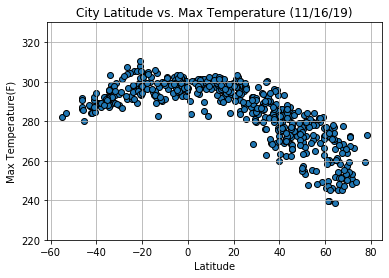

In [130]:
#cities_df_filling = cities_df.fillna(0,inplace=True)

x_axis = list(cities_df['Lat'])

# converting empty string values to 0.0 float incase of empty string values
for i in range(len(x_axis)): 
    if type(x_axis[i]) == str:
        x_axis[i]=0.0

y_axis = list(cities_df['Max Temp'])

# converting empty string values to 0.0 float incase of empty string values
for i in range(len(y_axis)):
    if type(y_axis[i]) == str:
        y_axis[i]=0.0       

plt.scatter(x_axis,y_axis,edgecolors='black')

plt.ylim(220,330)
plt.grid()

plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.title(f"City Latitude vs. Max Temperature ({todays_date})")
plt.savefig("..\Images\City Latitude vs. Max Temperature.png")

#### Latitude vs. Humidity Plot

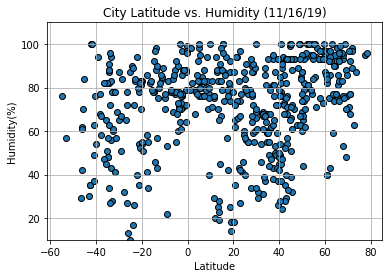

In [131]:
y_axis = list(cities_df['Humidity'])
# converting empty string values to 0.0 float incase of empty string values
for i in range(len(y_axis)):
    if type(y_axis[i]) == str:
        y_axis[i]=0.0
        
plt.scatter(x_axis,y_axis,edgecolor='black')

plt.grid()
plt.ylim(10,110)

plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({todays_date})")
plt.savefig("..\Images\City Latitude vs. Humidity.png")

#### Latitude vs. Cloudiness Plot

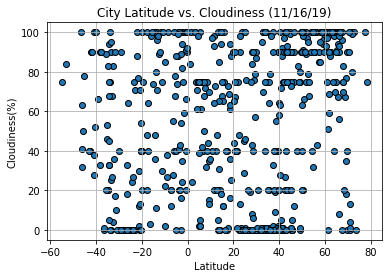

In [132]:
y_axis = list(cities_df['Cloudiness'])

# converting empty string values to 0.0 float incase of empty string values
for i in range(len(y_axis)):
    if type(y_axis[i]) == str:
        y_axis[i]=0.0
        
plt.scatter(x_axis,y_axis,edgecolor='black')

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({todays_date})")
plt.savefig("../Images/City Latitude vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

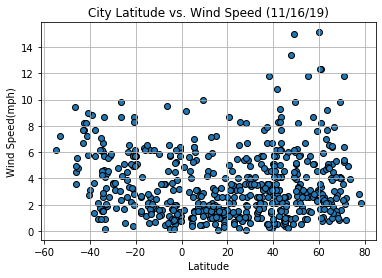

In [133]:
y_axis = list(cities_df['Wind Speed'])
# converting empty string values to 0.0 float incase of empty string values
for i in range(len(y_axis)):
    if type(y_axis[i]) == str:
        y_axis[i]=0.0
        
plt.scatter(x_axis,y_axis,edgecolor='black')

plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({todays_date})")
plt.savefig("../Images/City Latitude vs. Wind Speed.png")